# Some statistics using our data

In this notebook we will use the CSV file that was previously provided to present some basic concepts used in Statistics that may be applied to several situations. As it has been done previously, we will present graphically these data.



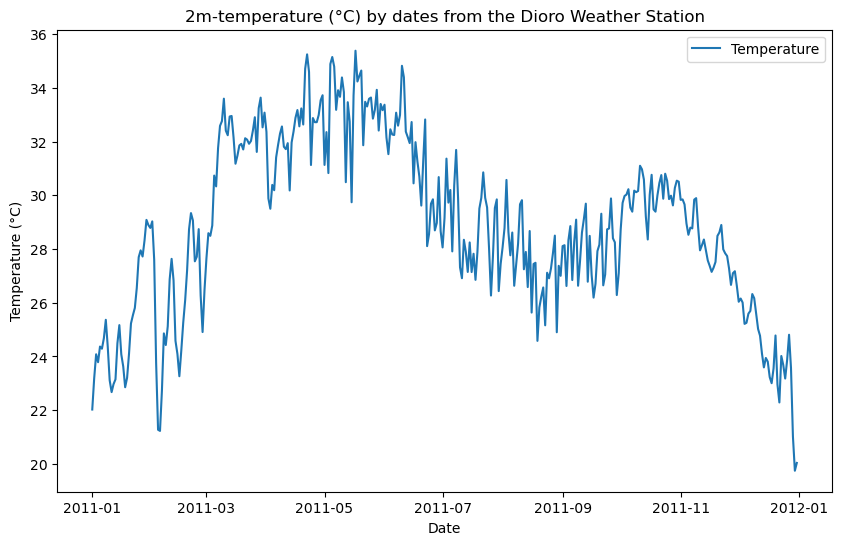

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file
df = pd.read_csv('cdm-02.csv')
# Convert the date column into a
# 'datetime' type
df['time'] = pd.to_datetime(df['time'])

# Graphical representation of the data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['2m temperature (°C)'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('2m-temperature (°C) by dates from' + ' the Dioro Weather Station')
plt.legend()
plt.show()


Now we will build the histogram of these data. An histogram is a kind of diagram in which the frequencies with which the different values of a given magnitude have been given.

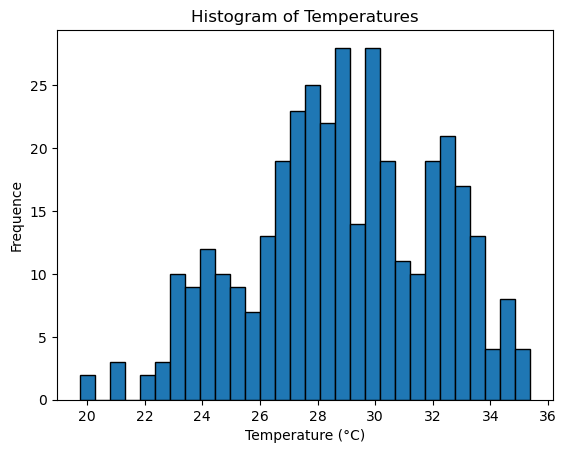

In [40]:
# The histogram is created

# Define the number of bins (it will be later used as well)
num_bins = 30

plt.hist(df['2m temperature (°C)'], bins=num_bins, edgecolor='black')

# Titles and tags are added
plt.title('Histogram of Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequence')

# The diagram is displayed
plt.show()

Let us now compute the mean value for this temperature:

In [41]:
mean_temp = df['2m temperature (°C)'].mean()

print(f'The mean for the temperature is: {mean_temp} °C')

The mean for the temperature is: 28.85372355890411 °C


Now let us compute the standard deviation of this temperature:

In [42]:
temp_var = df['2m temperature (°C)'].std()

print(f'The standard deviation for the temperature is: {temp_var} °C')

The standard deviation for the temperature is: 3.223802325791074 °C


For calculating the mode... in this case, since the temperature is a continous magnitude, data have to be grouped into bins, in the same way as we did for presenting the histogram. Because of this, another module is used, since with Pandas this is not possible

In [43]:
import numpy as np

# Calculate the histogram
frequencies, bin_edges = np.histogram(df['2m temperature (°C)'], bins=num_bins)

# Find the index of the bin with the highest frequency
mode_index = np.argmax(frequencies)

# The mode will be the average of the edges of the modal bin
interval_mode = (bin_edges[mode_index] + bin_edges[mode_index + 1]) / 2

print(f'The interval mode of the temperature is: {interval_mode} °C')

The interval mode of the temperature is: 28.869133833333336 °C


A _slightly_ version follows:

In [44]:
# Calculate the histogram
frequencies, bin_edges = np.histogram(df['2m temperature (°C)'], bins=num_bins)

# Find the indices of the bins with the highest frequency
mode_indices = np.where(frequencies == frequencies.max())[0]

# The modes will be the averages of the edges of the modal bins
interval_modes = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in mode_indices]

print(f'The interval modes of the temperature are: {interval_modes} °C')

The interval modes of the temperature are: [28.869133833333336, 29.9122001] °C


In the following step, a sort of statistical information is presented for these data of temperature for each month.

TypeError: unsupported operand type(s) for -: 'str' and 'int'

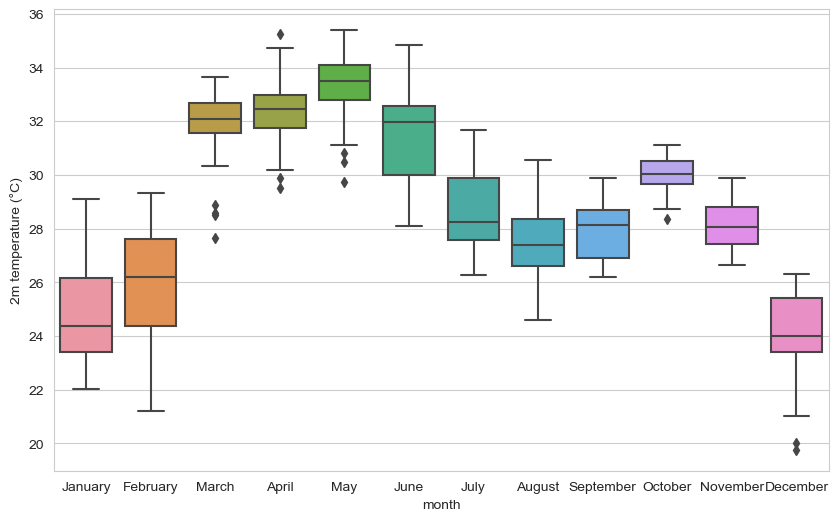

In [17]:
import seaborn as sns
from matplotlib.dates import DateFormatter
import calendar

# Read the SCV file
df = pd.read_csv('cdm-02.csv')

# Convert the date column in a 'datetime' class
df['time'] = pd.to_datetime(df['time'])

# Create a new column for the month
df['month'] = df['time'].dt.month

# Replace the month numbers with month names
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

# Create the boxplot grouping by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='month', y='2m temperature (°C)')

# Calculate the mean of the temperature of each month
mean_temps = df.groupby('month')['2m temperature (°C)'].mean()

# Add the curve with the mean values in the graphic
plt.plot(mean_temps.index-1, mean_temps.values, color='red', marker='o')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Boxplot diagram of the temperature by month')
plt.show()


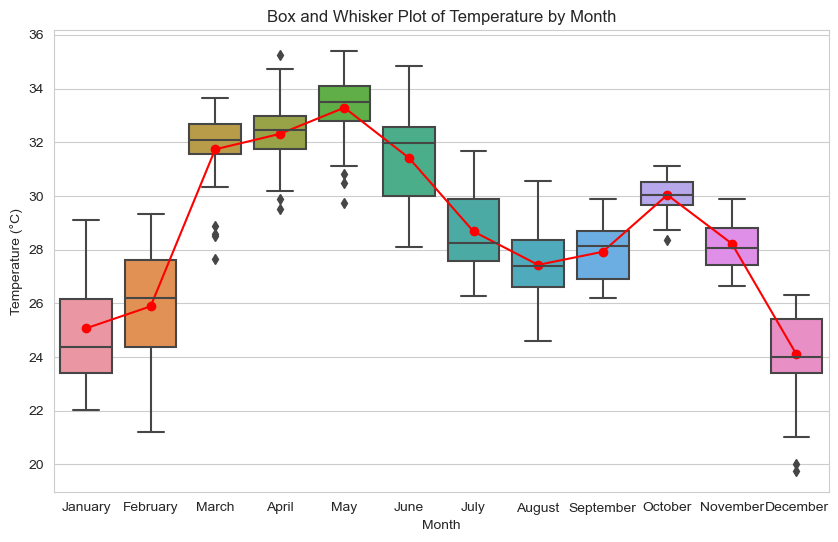

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Read the CSV file
df = pd.read_csv('cdm-02.csv')

# Convert the date column in a 'datetime' class
df['time'] = pd.to_datetime(df['time'])

# Create a new column for the month
df['month'] = df['time'].dt.month

# Replace the month numbers with month names
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

# Create the boxplot grouping by month
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='month', y='2m temperature (°C)', order=list(calendar.month_name[1:]))

# Calculate the mean of the temperature of each month
mean_temps = df.groupby('month')['2m temperature (°C)'].mean()

# Sort the mean values for the order of the months
mean_temps = mean_temps.reindex(list(calendar.month_name[1:]))

# Add the curve with the mean values in the graphic
plt.plot(mean_temps.index, mean_temps.values, color='red', marker='o')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Box and Whisker Plot of Temperature by Month')
plt.show()

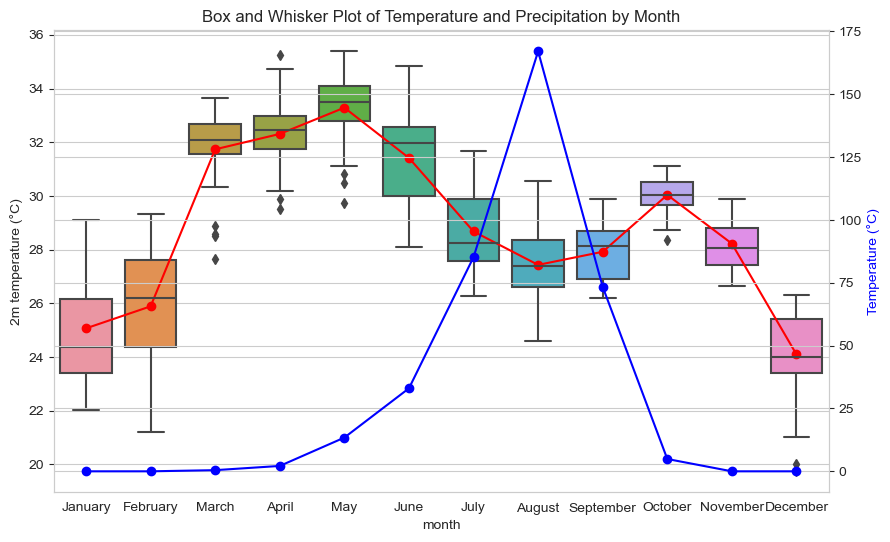

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Read the CSV file
df = pd.read_csv('cdm-02.csv')

# Convert the date column into a 'datetime' type
df['time'] = pd.to_datetime(df['time'])

# Create a new column for the month
df['month'] = df['time'].dt.month

# Replace the month numbers with month names
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

# Create the boxplot grouped by month for temperature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='month', y='2m temperature (°C)', order=list(calendar.month_name[1:]))

# Calculate the mean temperature for each month
mean_temps = df.groupby('month')['2m temperature (°C)'].mean()

# Order the means by the order of the months in the year
mean_temps = mean_temps.reindex(list(calendar.month_name[1:]))

# Add the curve of means to the plot
plt.plot(mean_temps.index, mean_temps.values, color='red', marker='o')

# Calculate the sum of precipitation for each month
sum_precip = df.groupby('month')['Precipitation flux (mm day⁻¹)'].sum()

# Order the sums by the order of the months in the year
sum_precip = sum_precip.reindex(list(calendar.month_name[1:]))

# Add the curve of sums to the plot on a second y-axis
ax2 = plt.twinx()
ax2.plot(sum_precip.index, sum_precip.values, color='blue', marker='o')
ax2.set_ylabel('Precipitation flux (mm day⁻¹)', color='blue')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Box and Whisker Plot of Temperature and Precipitation by Month')
plt.show()